<a href="https://colab.research.google.com/github/i-was-here/summer-intern-tasks-iitgn/blob/main/Task1_SRIP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from jax import random
import numpy as np
import jax

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, PathPatch
from matplotlib.text import TextPath
from matplotlib.transforms import Affine2D
import mpl_toolkits.mplot3d.art3d as art3d
%matplotlib inline

In [ ]:
key = random.PRNGKey(0)

In [ ]:
mean = np.array([0.0, 0.0])
cov = np.array([[1.0, 0.0],[0.0, 1.0]])

In [ ]:
list_of_all_points = [random.multivariate_normal(random.PRNGKey(i), mean, cov) for i in range(1000)]

In [ ]:
def normal_dist(x , mean , sd):
    prob_density = jax.numpy.exp(-0.5*((x-mean)/sd)**2)/(sd*jax.numpy.sqrt(jax.numpy.pi*2))
    return prob_density

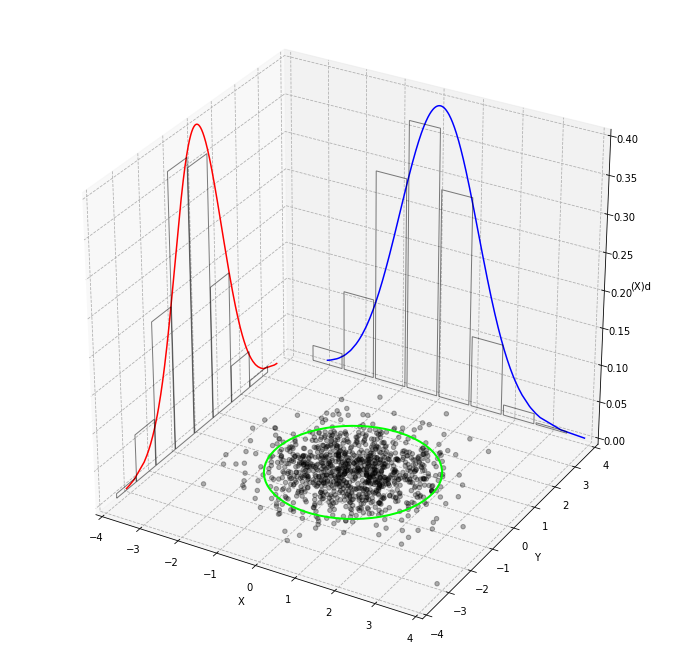

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x= [i[0] for i in list_of_all_points]
y= [i[1] for i in list_of_all_points]
z= [0 for i in range(1000)]


mean_x = jax.numpy.mean(jax.numpy.array(x))
sd_x = jax.numpy.std(jax.numpy.array(x))

mean_y = jax.numpy.mean(jax.numpy.array(y))
sd_y = jax.numpy.std(jax.numpy.array(y))

fig= plt.figure(figsize=(12,12))
ax= fig.add_subplot(1, 1, 1, projection= '3d')
# ax.yaxis.grid(linestyle='dashed',color='r')
ax.zaxis._axinfo["grid"].update({'linestyle':'dashed'})
ax.xaxis._axinfo["grid"].update({'linestyle':'dashed'})
ax.yaxis._axinfo["grid"].update({'linestyle':'dashed'})
ax.scatter(x,y, alpha=0.3,color = 'black',zdir='z')

p = Circle((mean_x, mean_y), ((sd_x+sd_y)),fill=False,color = 'lime',linewidth=2)
ax.add_patch(p)
art3d.pathpatch_2d_to_3d(p, z=0, zdir="z")

x.sort()
pdf_x = normal_dist(jax.numpy.array(x),mean_x,sd_x)

hist, bin_edges = np.histogram(x, bins=8,density=True)
ax.bar(bin_edges[:-1], hist, color='b', alpha=0.5,zdir='y',zs=4,fill=False)
ax.plot(x,pdf_x,color='b',zdir='y',zs=4)

y.sort()
pdf_y = normal_dist(jax.numpy.array(y),mean_y,sd_y)

hist, bin_edges = np.histogram(y, bins=8,density=True)
ax.bar(bin_edges[:-1], hist, color='r', alpha=0.5,zdir='x',zs=-4,fill=False)
ax.plot(y,pdf_y,color='r',zdir='x',zs=-4)

ax.set_xlim([-4, 4])
ax.set_ylim([-4, 4])
ax.set_zlim([0, 0.4])

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('(X)d')
plt.show()